# Kaggle Titanic
## Classification - Random Forest
[참고 | Titanic (Classifiaction Models)](https://www.kaggle.com/code/fatmakursun/titanic-classification-models)
### Random Forest 모델을 이용한 분류
Decision Tree가 Overfitting 될 가능성을 염두하고, 일반화된 트리를 만드는 방법이 **Random Forest** 방법임  
기본적으로 앙상블 모델이며, Decsion Tree에서 최대 트리 높이(`max_depth`)를 조절해 Overfitting을 방지하는 것이 아니라,  
여러개의 Decision Tree를 이용해 가장 높은 점수를 얻은 결정 트리를 이용하는 방식  

### 사용 라이브러리

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 데이터 전처리
다른 파일에서 진행했음

In [3]:
def age_pclass(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1: return 38
        elif Pclass==2: return 29
        else: return 25
    else: return Age

In [4]:
train = pd.read_csv("data/train.csv", encoding="utf-8")
train["Age"] = train[["Age", "Pclass"]].apply(age_pclass, axis=1)
train["Embarked"] = train["Embarked"].fillna('S')
train.drop(columns='Cabin', axis=1, inplace=True)
train.dropna(inplace=True)
sex = pd.get_dummies(data=train["Sex"], drop_first=True)
embark = pd.get_dummies(data=train["Embarked"], drop_first=True)
train.drop(columns=["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### 학습 및 평가

In [5]:
target = "Survived"
features_names = train.columns.tolist()
features_names.remove(target)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train[features_names], train[target], test_size=0.1, stratify=train[target])
print(f"X_trian: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\n y_test: {y_test.shape}")

X_trian: (801, 9)
y_train: (801,)
X_test: (90, 9)
 y_test: (90,)


In [8]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [9]:
y_predict = rf.predict(X_test)

In [10]:
accuracy_score(y_test, y_predict)

0.8111111111111111

데이터 전처리를 제외한 튜닝 없이, 81점의 정확도가 나옴

### 모델 분석

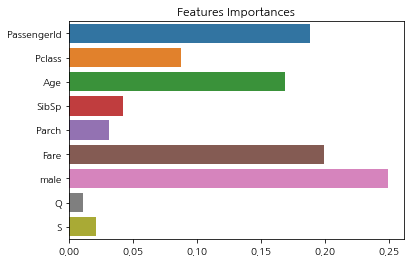

In [18]:
_ = sns.barplot(x=rf.feature_importances_, y=features_names).set_title("Features Importances")